# Illustrating dimensionality and image size in convolutions layers
A quick attempt to illustrate what convolutional layers do and a playground for experimenting with convolutional layers.

In [ ]:
from io import BytesIO

from PIL import Image
import requests
import torch.nn as nn
from torchvision.transforms.functional import to_pil_image, to_tensor

## Get an image

In [ ]:
obama = requests.get('https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg')

obama_image = Image.open(BytesIO(obama.content))

# convert PIL image into torch.tensor batch with size (1, 3, 300, 300) == (batch size, channels, height, width)
obama_tensor_batch = to_tensor(obama_image).unsqueeze(0)
obama_tensor_batch.shape

torch.Size([1, 3, 300, 300])

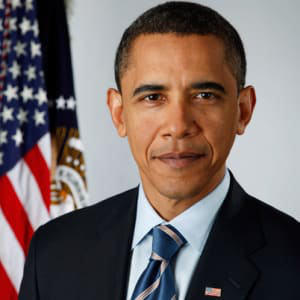

In [ ]:
obama_image

## Create an (untrained) convolutional layer
The number of `in_channels` is 3 (RGB), and the number of `out_channels` (for the sake of illustration) will also be 3 (RGB). The input image (tensor) size is `(3, 300, 300)`. The output image (tensor) size can be calculated as follows (for both height and width):<br><br>

$output\_image\_width = \frac{input\_image\_width\ -\ filter\_width\ +\ 2\ \cdot\ padding}{stride} + 1$<br><br>

$output\_image\_width = \frac{300\ -\ 3\ +\ 2\ \cdot\ 1}{1} + 1\ =\ 300$

<br>These equations are nothing fancy. Just count how many times you can use the filter to take a (filter-sized) snapshot across the inputs. Or in other words, how many times can you shift the filter to the right? See the explanation below.

![](https://miro.medium.com/max/1052/0*dSjXKGG6kJ5kVUgJ)

So the above filter is 5 wide, but your (yellow) filter is 3 wide. So you can only take 5 (image width) - 3 (filter width) + 1 snapshots across the width (== 3 total). There is no padding in the above image. If you added padding to one side, you could take one more snapshot. And if you added it to both sides, you could take 2 (== padding x 2) more snapshots. And if your stride was 2, you'd have to divide the total number of snapshots by 2 since you would move 2 to the right for each snapshot.

Image taken from [this post](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53).

In [ ]:
# image 3 x 300 x 300 => 3 x 300 x 300 (dimensionality the same)
conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(3, 3), padding=1)

## Process the image with the (untrained) convolutional layer

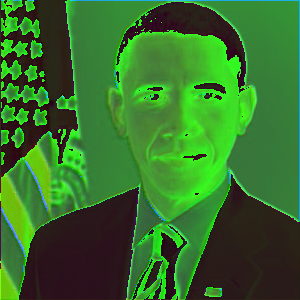

In [ ]:
filtered = conv1(obama_tensor_batch)
to_pil_image(filtered[0])  # convert only the first item in the batch to an image

## Create another (untrained) convolutional layer with a bigger filter that shrinks the image<br>
Let's use a filter of 15 x 15 and no padding.<br><br>
$output\_image\_width = \frac{300\ -\ 15\ +\ 2\ \cdot\ 0}{1} + 1\ =\ 286$

In [ ]:
# image 3 x 300 x 300 => 3 x 286 x 286 (dimensionality changes)
conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(15, 15), padding=0)

## Process the image with the new (untrained) convolutional layer

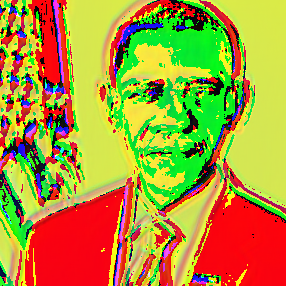

In [ ]:
filtered = conv2(obama_tensor_batch)
to_pil_image(filtered[0])  # convert only the first item in the batch to an image

## Add the two convolutional layers together

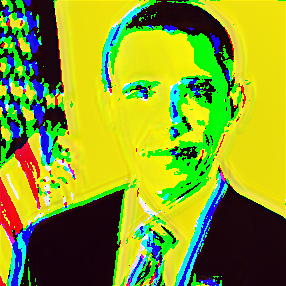

In [ ]:
# the final image will be 3 x 286 x 286
# we can do this because:
#   (1) the out_channels of conv1 match the in_channels of conv2 and 
#   (2) the image is big enough to accommodate the kernel/filter
output = conv2(conv1(obama_tensor_batch))
to_pil_image(output[0])